<a href="https://colab.research.google.com/github/SankithaDevatha/Python/blob/main/Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Step 1: Load the dataset and display summary statistics
digits = load_digits()
data = digits.data
columns = digits.feature_names
df = pd.DataFrame(data, columns=columns)

print(df.describe())

       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

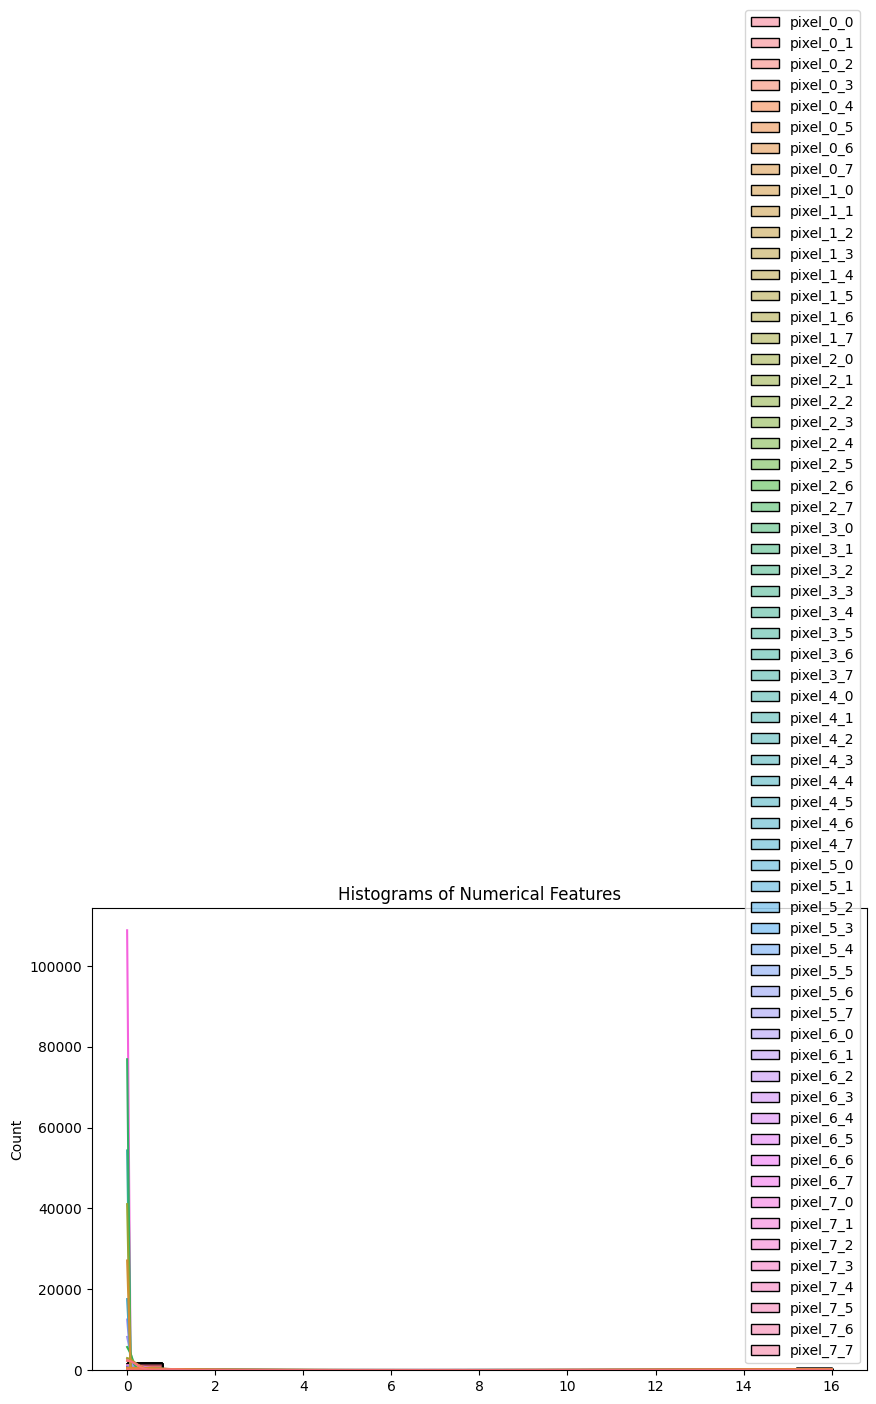

In [4]:
# Step 2: Visualize the distributions of numerical features using histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=20, kde=True)
plt.title("Histograms of Numerical Features")
plt.show()

In [44]:
# Step 3: Implement and compare scaling techniques
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

data_standard = scaler_standard.fit_transform(data)
data_minmax = scaler_minmax.fit_transform(data)

In [45]:
# Step 5: Normalize the dataset using L2 normalization and display normalized data
data_normalized = normalize(data, norm='l2')
df_normalized = pd.DataFrame(data_normalized, columns=columns)
print(df_normalized.head())

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0   0.090240   0.234625   0.162433   0.018048   
1        0.0        0.0   0.000000   0.184966   0.200380   0.077069   
2        0.0        0.0   0.000000   0.060385   0.226443   0.181154   
3        0.0        0.0   0.128815   0.276032   0.239228   0.018402   
4        0.0        0.0   0.000000   0.018036   0.198400   0.000000   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0   0.000000  ...   0.000000        0.0   
1        0.0        0.0        0.0   0.000000  ...   0.000000        0.0   
2        0.0        0.0        0.0   0.000000  ...   0.075481        0.0   
3        0.0        0.0        0.0   0.147217  ...   0.165619        0.0   
4        0.0        0.0        0.0   0.000000  ...   0.000000        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0   0.108288   0.234625

In [47]:
# Step 6: Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

# Apply scaling techniques to both subsets
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [48]:
# Step 7: Train a simple Linear Regression model and compare performance
model_scaled_standard = LinearRegression()
model_scaled_minmax = LinearRegression()

model_scaled_standard.fit(X_train_scaled_standard, y_train)
model_scaled_minmax.fit(X_train_scaled_minmax, y_train)

y_pred_scaled_standard = model_scaled_standard.predict(X_test_scaled_standard)
y_pred_scaled_minmax = model_scaled_minmax.predict(X_test_scaled_minmax)

mse_scaled_standard = mean_squared_error(y_test, y_pred_scaled_standard)
mse_scaled_minmax = mean_squared_error(y_test, y_pred_scaled_minmax)

print("MSE with StandardScaler:", mse_scaled_standard)
print("MSE with Min-Max Scaler:", mse_scaled_minmax)

MSE with StandardScaler: 3.257880803281143
MSE with Min-Max Scaler: 3.259968922611177
